IMPORT DEPENDANCIES

In [1]:
#for dealing with multidimensional arrays
import numpy as np
#for data analysis on the dataset
import pandas as pd
#for data mining and data processing
import sklearn
#for visualizations & graphs
import matplotlib.pyplot as plt
import seaborn as sns
#to standardize data in a particular range
from sklearn.preprocessing import StandardScaler
#to spit data into train & test respectively
from sklearn.model_selection import train_test_split
#importing the required ML algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

DATA COLLECTION & ANALYSIS


In [3]:
#load diabetes dataset to pandas dataframe
diabetes_dataset=pd.read_csv('C:/Users/91831/Desktop/Codes/Python/DiabetesPred/diabetes.csv')
diabetes=diabetes_dataset.dropna()

In [4]:
#print first 5 rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#check whether cols are true/false based on dtypes
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#data correlation
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
#number of rows and columns in the dataset
diabetes_dataset.shape

(768, 9)

In [8]:
#getting statistical measures of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#counts for diabetic and non diabetic
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0- non diabetic
1- diabetic

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


-Group datasets,draw meaningful insights
-eg: glucose,age factors


In [11]:
#seperate data and labels
X= diabetes_dataset.drop(columns='Outcome',axis=1)
Y= diabetes_dataset['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA STANDARDIZATION

-Standardize data in a machine learning model to make better predictions 
via std scaler function


In [14]:
scaler= StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data=scaler.transform(X)

In [17]:
#in order to bring values within the similar range
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
X= standardized_data
Y= diabetes_dataset['Outcome']

X- represents the data, Y-represents the model

In [19]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


TRAIN TEST SPLIT

X train-- train X_train data without X_test

X-test-- train X_train data using X_test(ML model makes prediction in this unknown data)

Y-train -- represents labels for the X_train data

Y_test -- represents labels for X_test data(i.e diabetic/ non--diabetic)

Stratify- split the data in same proportion, avoid interchange of data i.e diabetic/non-diab into any one df

random_state-- replicate data in a certain manner-o/p same result

In [20]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


TRAINING THE MODEL

SVC- support vector classifier

In [22]:
classifier = svm.SVC(kernel='linear')

In [23]:
#training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

LR-Logistic Regression

In [24]:
log_reg = LogisticRegression(random_state=2, max_iter=1000)

fit method- trains model on training data

predict method- tests on testing data

In [25]:
log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [26]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

RF- Random Forest

n_estimators- no  of trees to build before max- predictions

entropy- criterion measures impurity &
uncertainity in obs

criterion- measures quality of split

In [27]:
#randomforest
forest=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=2)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [28]:
#predict for forest classifier.
y_pred=forest.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

KNN- K-Nearest Neighbors

K=1 , follows close to train data-high score/ test score-low (overfitting)

k-increase- knn fits smoother

In [29]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
#predict for KNN.
y_pred=KNN.predict(X_test)

In [31]:
#what classification model is getting right and what types of errors
print(confusion_matrix(Y_test,y_pred))
# to measure the quality of predictions from a classification algorithm
print(classification_report(Y_test,y_pred))

[[78 22]
 [31 23]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.51      0.43      0.46        54

    accuracy                           0.66       154
   macro avg       0.61      0.60      0.61       154
weighted avg       0.64      0.66      0.65       154



precision- proportion of pos identifications

recall-proportion of actual pos-correctly identified

f1 score- comb(prec+recall)

support-no of samples- metrics calc on

MODEL EVALUATION

Accuracy Score

In [32]:
#accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
#accuracy score on test data
X_test_prediction=classifier.predict(X_test)

In [33]:
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [34]:
#accuracy score for svm
print('Accuracy score of the training data:',training_data_accuracy)
print('Accuracy score of the test data:',test_data_accuracy)

Accuracy score of the training data: 0.7866449511400652
Accuracy score of the test data: 0.7727272727272727


In [35]:
#accuracy score for logisitic regression
print("Logistic Regression Classifier  Accuracy: ",accuracy_score(Y_test,y_pred))

Logistic Regression Classifier  Accuracy:  0.6558441558441559


In [36]:
#accuracy score for Random Forest
print("Random Forest Classifier Training Accuracy: ",forest.score(X_test,Y_test))

Random Forest Classifier Training Accuracy:  0.7532467532467533


In [37]:
#accuracy score for KNN 
print("KNN classifier training accuracy: ",KNN.score(X_test,Y_test))

KNN classifier training accuracy:  0.6558441558441559


accuracy= 0.78.. -- Means out of 100 times model is predicting 78 times correct predictions

Accuracy=0.77.. --Means the ML model performs well on test data too

No Overfitting(i.e higher value of train data than compared to test data)




MAKING A PREDICTIVE SYSTEM

In [38]:
input_data=(1,89,66,23,94,28.1,0.167,21)

#Change the input data to a numpy array
data_input_as_numpy_array=np.asarray(input_data)

#Reshape array as we predict for one instance/data point
data_input_reshaped=data_input_as_numpy_array.reshape(1,-1)

#Standardize input data
std_data=scaler.transform(data_input_reshaped)
print(std_data)

prediction= classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
   print('Person is non diabetic')
else:
  print('Person is diabetic')

[[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]
[0]
Person is non diabetic


reshape(1,-1)-- Not reshaping the array for 768 datasets, 
but only for any one instance in particular

DATA VISUALIZATION


ExtraTreesClassifier()--Extremely Randomized Trees Classifier 


[0.23719896 0.1435854  0.09866837 0.14242298 0.10725907 0.07843124
 0.07306968 0.1193643 ]


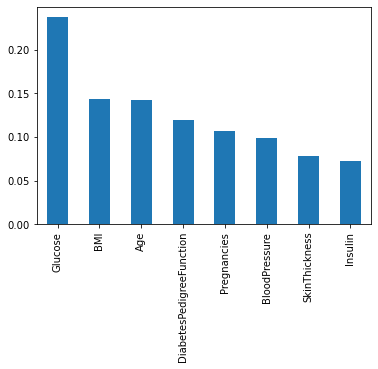

In [39]:
#order of importance
v=diabetes_dataset[['Glucose', 'BMI','BloodPressure', 'Age', 'Pregnancies', 'SkinThickness',
       'Insulin', 'DiabetesPedigreeFunction']]
w=diabetes_dataset.iloc[:,8]

model = ExtraTreesClassifier()
model.fit(v,w)
print(model.feature_importances_) 
#plotting graph in order of their features of importance for better visualization
feat_imp = pd.Series(model.feature_importances_, index=v.columns)
feat_imp.nlargest(20).plot(kind='bar')
plt.show()

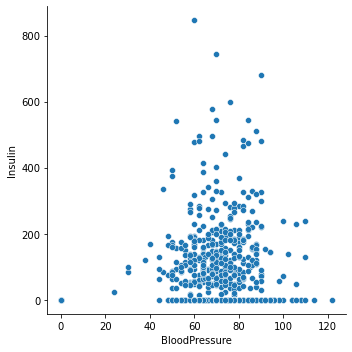

In [40]:
#the unstable relationship between insulin & BP
sns.relplot(x="BloodPressure", y="Insulin", data = diabetes)

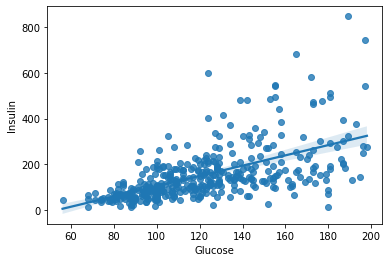

In [41]:
diabetes_clean = diabetes[diabetes['Insulin'] != 0]
diabetes_clean2 = diabetes_clean[diabetes_clean['Glucose'] != 0]
ax = sns.regplot(x="Glucose", y="Insulin", data=diabetes_clean2)